Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score, precision_score, recall_score

Data collection and preprocessing

In [ ]:
dataset = pd.read_csv('/content/indian_liver_patient.csv')

In [ ]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
dataset.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
dataset.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [ ]:
dataset.shape

(583, 11)

In [ ]:
dataset['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [ ]:
dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

In [ ]:
dataset.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


Analyse the data

In [ ]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
dataset['target'] = dataset['Dataset']

In [ ]:
liver_dataset = dataset.drop('Dataset', axis = 1)

In [ ]:
liver_dataset['target'].value_counts()

,count
target,
1,416
2,167


1 -> DEFECTIVE

2 -> NON DEFECTIVE

Data visualization

<ipython-input-19-c13b6c0841f7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

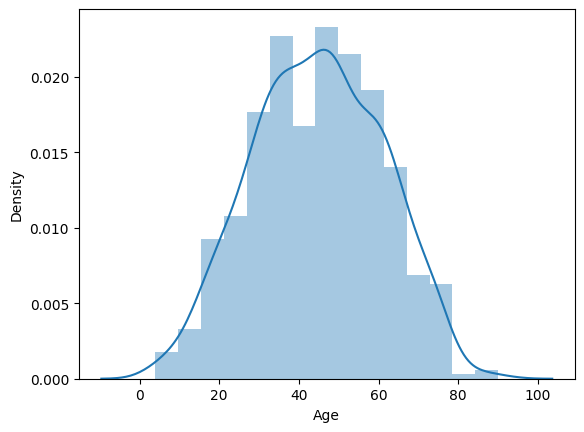

In [ ]:
sns.distplot(dataset['Age'])

<ipython-input-20-abcc0052a4d0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Total_Bilirubin'])


<Axes: xlabel='Total_Bilirubin', ylabel='Density'>

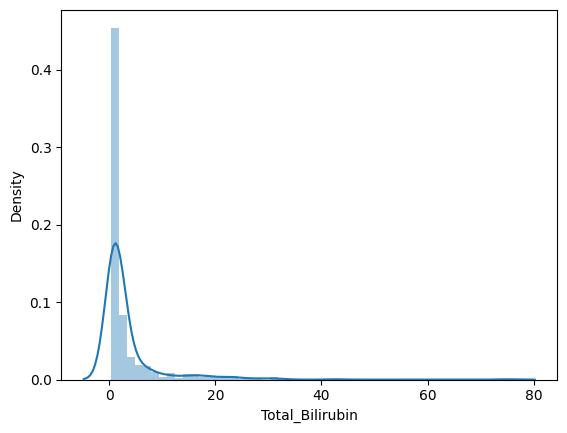

In [ ]:
sns.distplot(dataset['Total_Bilirubin'])

<ipython-input-21-d0df08dc1a52>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Direct_Bilirubin'])


<Axes: xlabel='Direct_Bilirubin', ylabel='Density'>

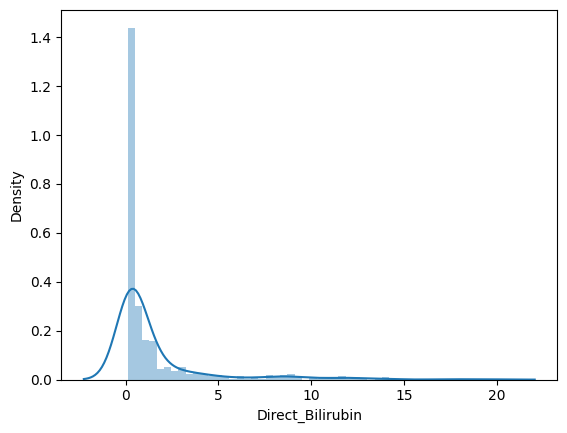

In [ ]:
sns.distplot(dataset['Direct_Bilirubin'])

<ipython-input-22-13410c24921a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Alkaline_Phosphotase'])


<Axes: xlabel='Alkaline_Phosphotase', ylabel='Density'>

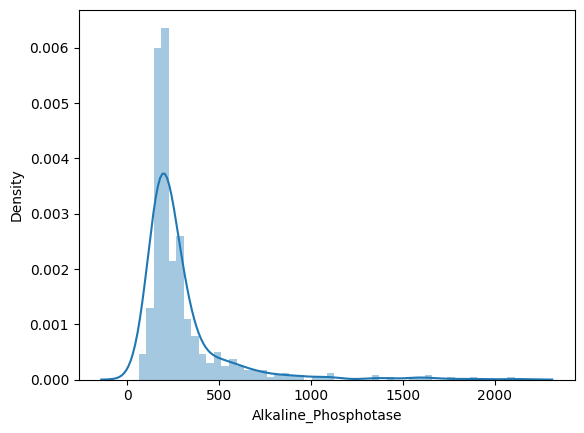

In [ ]:
sns.distplot(dataset['Alkaline_Phosphotase'])

<ipython-input-23-8d1ab0273d92>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Alamine_Aminotransferase'])


<Axes: xlabel='Alamine_Aminotransferase', ylabel='Density'>

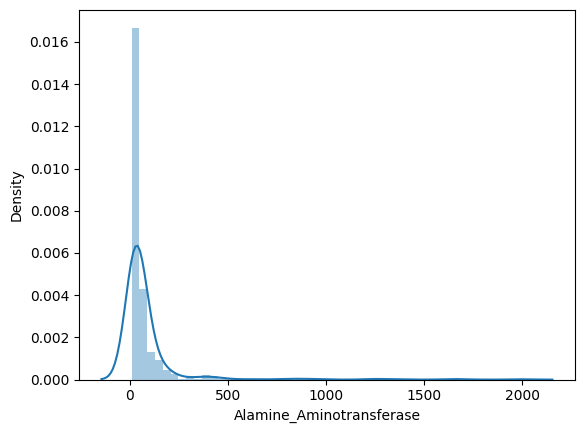

In [ ]:
sns.distplot(dataset['Alamine_Aminotransferase'])

<ipython-input-24-f74d8259e15c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Aspartate_Aminotransferase'])


<Axes: xlabel='Aspartate_Aminotransferase', ylabel='Density'>

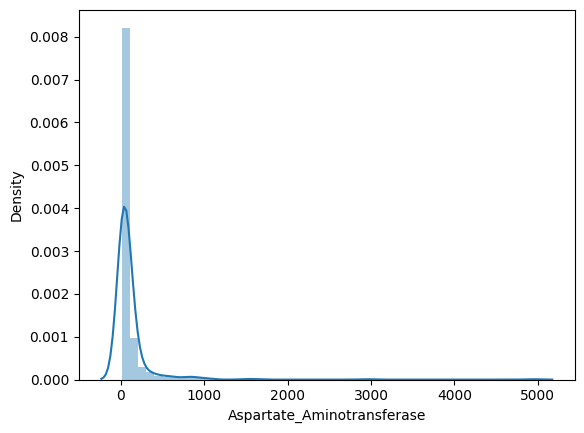

In [ ]:
sns.distplot(dataset['Aspartate_Aminotransferase'])

<ipython-input-25-f4ac3cc7d03f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Total_Protiens'])


<Axes: xlabel='Total_Protiens', ylabel='Density'>

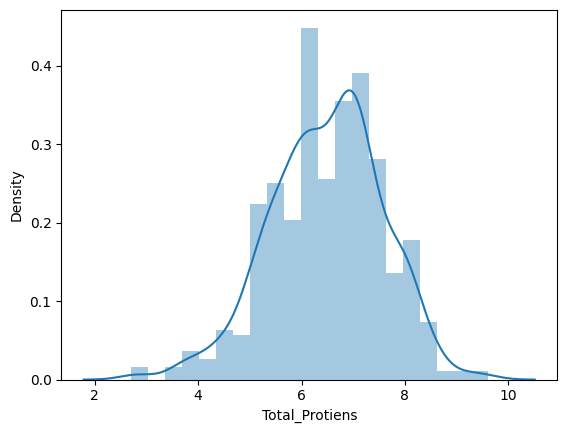

In [ ]:
sns.distplot(dataset['Total_Protiens'])

<ipython-input-26-55135eb50980>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Albumin'])


<Axes: xlabel='Albumin', ylabel='Density'>

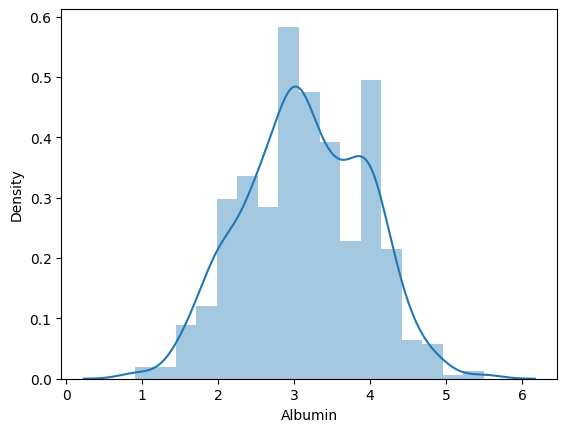

In [ ]:
sns.distplot(dataset['Albumin'])

<ipython-input-27-319bd1f02a8e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Albumin_and_Globulin_Ratio'])


<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Density'>

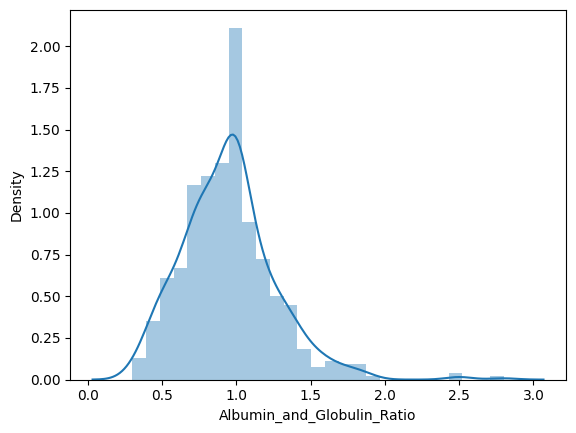

In [ ]:
sns.distplot(dataset['Albumin_and_Globulin_Ratio'])

Convert text into numerical

In [ ]:
liver_dataset.replace({"Gender":{'Male':0,'Female':1}}, inplace=True)

In [ ]:
liver_dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Finding positive and negative correlation

In [ ]:
correlation = liver_dataset.corr()

<Axes: >

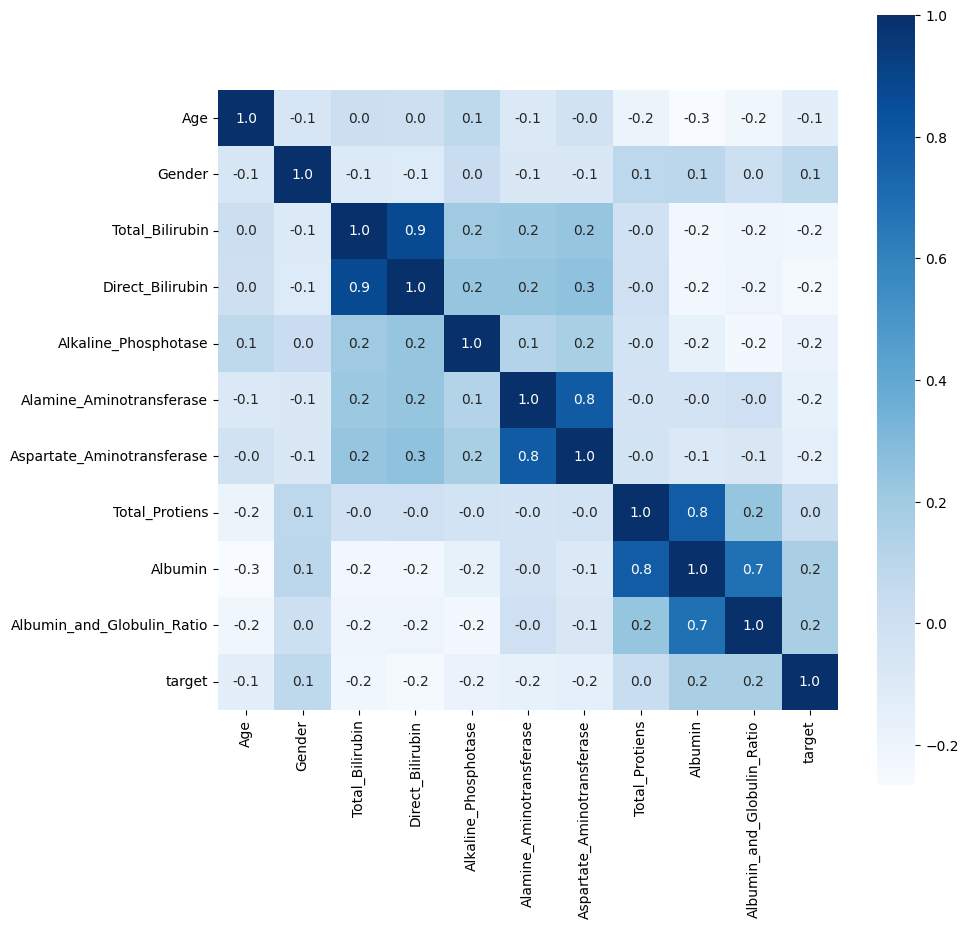

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

Seperating feature and target

In [ ]:
X = liver_dataset.drop(columns='target', axis=1)
Y = liver_dataset['target']

In [ ]:
print(X)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       1              0.7               0.1                   187   
1     62       0             10.9               5.5                   699   
2     62       0              7.3               4.1                   490   
3     58       0              1.0               0.4                   182   
4     72       0              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       0              0.5               0.1                   500   
579   40       0              0.6               0.1                    98   
580   52       0              0.8               0.2                   245   
581   31       0              1.3               0.5                   184   
582   38       0              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: target, Length: 583, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(583, 10) (466, 10) (117, 10)


Model training 1

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
svm_clf = SVC(probability=True)  # Enable probability estimates for soft voting
mlp_clf = MLPClassifier(max_iter=1000)

# Combine models into a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('knn', knn_clf),
        ('lr', lr_clf),
        ('svm', svm_clf),
        ('mlp', mlp_clf)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted probabilities
)

In [ ]:
voting_clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('svm', SVC(probability=True)),
                             ('mlp', MLPClassifier(max_iter=1000))],
                 voting='soft')

In [ ]:
training_data_prediction = voting_clf.predict(X_train)
acc_score_train = accuracy_score(Y_train, training_data_prediction)
print("Accuracy score : ", acc_score_train)

Accuracy score :  0.8218884120171673


In [ ]:
test_data_prediction = voting_clf.predict(X_test)
acc_score_test = accuracy_score(Y_test, test_data_prediction)
print("Accuracy score : ", acc_score_test)

Accuracy score :  0.7008547008547008


Model training 2

In [ ]:
log_clf = LogisticRegression()
svc_clf = SVC(probability=True)  # Enable probability estimates for soft voting
nb_clf = GaussianNB()
rf_clf = RandomForestClassifier()

# Combine models into a Voting Classifier
voting1_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('svc', svc_clf),
        ('nb', nb_clf),
        ('rf', rf_clf)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted probabilities
)

In [ ]:
voting1_clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svc', SVC(probability=True)),
                             ('nb', GaussianNB()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [ ]:
training_data_prediction = voting1_clf.predict(X_train)
acc_score_train = accuracy_score(Y_train, training_data_prediction)
print("Accuracy score : ", acc_score_train)

Accuracy score :  0.9399141630901288


In [ ]:
test_data_prediction = voting1_clf.predict(X_test)
acc_score_test = accuracy_score(Y_test, test_data_prediction)
print("Accuracy score : ", acc_score_test)

Accuracy score :  0.6837606837606838


Model training 3 - ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
#input layer
model.add(Dense(20, input_shape = (10,)))
#hidden layer
model.add(Dense(20, activation = 'relu'))
#output layer
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0885 - loss: 68.2059    
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5940 - loss: 14.7917
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 0.0210  
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - loss: -17.0420 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7008 - loss: -33.9874 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7069 - loss: -42.1260 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7434 - loss: -48.1337 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7044 - loss: -66.7716 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - loss: -86.5149 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7231 - loss: -93.3384  
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6844 - loss: -136.9684 
Epoch 12/100
15/15 ━━━━━━━━━━

In [ ]:
val_loss, val_acc =model.evaluate(X_test, Y_test)
print(val_loss, val_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7025 - loss: -180444.7344  
-174853.5 0.7094017267227173


ANN - 2 hidden layer

In [ ]:
model1 = Sequential()

In [ ]:
#input layer
model1.add(Dense(20, input_shape = (10,)))
#hidden layer
model1.add(Dense(20, activation = 'relu'))
#hidden layer
model1.add(Dense(20, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7093 - loss: -195630.7344 
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6987 - loss: -223478.9219 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: -227943.0781  
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7051 - loss: -212043.7812 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7010 - loss: -227428.2031 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7293 - loss: -199676.6250 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7014 - loss: -245388.5469 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7262 - loss: -236182.6875  
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - loss: -260493.4531  
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7385 - loss: -228664.9062  
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7126 - lo

In [ ]:
val_loss1, val_acc1 =model1.evaluate(X_test, Y_test)
print(val_loss1, val_acc1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: -9.0199  
-8.8417387008667 0.7008547186851501


Seperatae models

In [ ]:
#Support vector machine

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_pred)

In [ ]:
print("Accuracy score for Support Vector Machine", svm_acc)

Accuracy score for Support Vector Machine 0.7094017094017094


In [ ]:
svm_pred = svm.predict(X_train)
svm_acc1 = accuracy_score(Y_train, svm_pred)

In [ ]:
print("Accuracy score for Support Vector Machine", svm_acc1)

Accuracy score for Support Vector Machine 0.7145922746781116


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

# Use appropriate metrics for regression
mse = mean_squared_error(Y_test, lr_pred)
r2 = r2_score(Y_test, lr_pred)

print("Mean Squared Error for Linear Regression:", mse)
print("R-squared for Linear Regression:", r2)

Mean Squared Error for Linear Regression: 0.19891957291800563
R-squared for Linear Regression: 0.03507794696152422
